Для анализа выбран датасет **Banana Quality**. Данные содержат поведенческую информацию о 200 клиентах торгового центра.

**Характеристики данных:**
*   **Объем:** 8000 записей, 8 признаков.
*   **Тип признаков:** Числовые (Size, Weight, Sweetness, Softness, HarvestTime, Ripeness, Acidity) и категориальный (Quality).

Для кластеризации использовались 7 числовых признаков: размер (Size), вес (Weight), сладость (Sweetness), мягкость (Softness), время сбора урожая (HarvestTime), степень зрелости (Ripeness) и кислотность (Acidity).

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, rand_score, adjusted_rand_score, jaccard_score, pairwise_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering
warnings.filterwarnings('ignore')


sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


df = pd.read_csv('banana_quality.csv')

print("Основная информация о датасете")
print("\n")
print(f"Размерность данных: {df.shape}")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")
print("Первые 5 строк:")
print("\n")
df.head()



Основная информация о датасете


Размерность данных: (8000, 8)
Количество строк: 8000
Количество столбцов: 8
Первые 5 строк:




,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [216]:
print("Описательная статистика:")
print("\n")
df.describe()

Описательная статистика:




,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


In [217]:
print("\nПропуски:")
print("\n")
print(df.isnull().sum())


Пропуски:


Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


В данном датасете отсутствуют пропуски

**Описание признаков:**

1. Size (размер)
Значение: Размер банана, характеризующий его габариты. Влияет на товарный вид и вес плода.
Тип данных: числовой (float64).
Единица измерения: стандартизированные условные единицы (шкала от -8 до +8).

2. Weight (вес)
Значение: Масса банана. Важный параметр для оценки качества и коммерческой ценности плода.
Тип данных: числовой (float64).
Единица измерения: стандартизированные условные единицы (шкала от -8 до +8).

3. Sweetness (сладость)
Значение: Содержание сахаров в банане. Определяет сладость плода и является ключевым показателем вкусовых качеств.
Тип данных: числовой (float64).
Единица измерения: стандартизированные условные единицы (шкала от -6.5 до +7.5).

4. Softness (мягкость)
Значение: Степень мягкости/твердости мякоти банана. Влияет на зрелость и текстуру плода.
Тип данных: числовой (float64).
Единица измерения: стандартизированные условные единицы (шкала от -7 до +8).

5. HarvestTime (время сбора урожая)
Значение: Время, когда был собран банан. Влияет на степень зрелости и срок хранения.
Тип данных: числовой (float64).
Единица измерения: стандартизированные условные единицы (шкала от -7.5 до +6.5).

6. Ripeness (степень зрелости)
Значение: Уровень созревания банана. Определяет готовность к употреблению и вкусовые характеристики.
Тип данных: числовой (float64).
Единица измерения: стандартизированные условные единицы (шкала от -7.5 до +7.5).

7. Acidity (кислотность)
Значение: Кислотность банана, влияющая на баланс вкуса между сладостью и кислотностью.
Тип данных: числовой (float64).
Единица измерения: стандартизированные условные единицы (шкала от -8 до +7.5).

8. Quality (качество)
Значение: Оценка качества банана по категориям. Определяет пригодность для продажи и потребления.
Тип данных: категориальный (Good/Bad).
Значение: Категориальная оценка - "Good" (хорошее качество) или "Bad" (плохое качество).

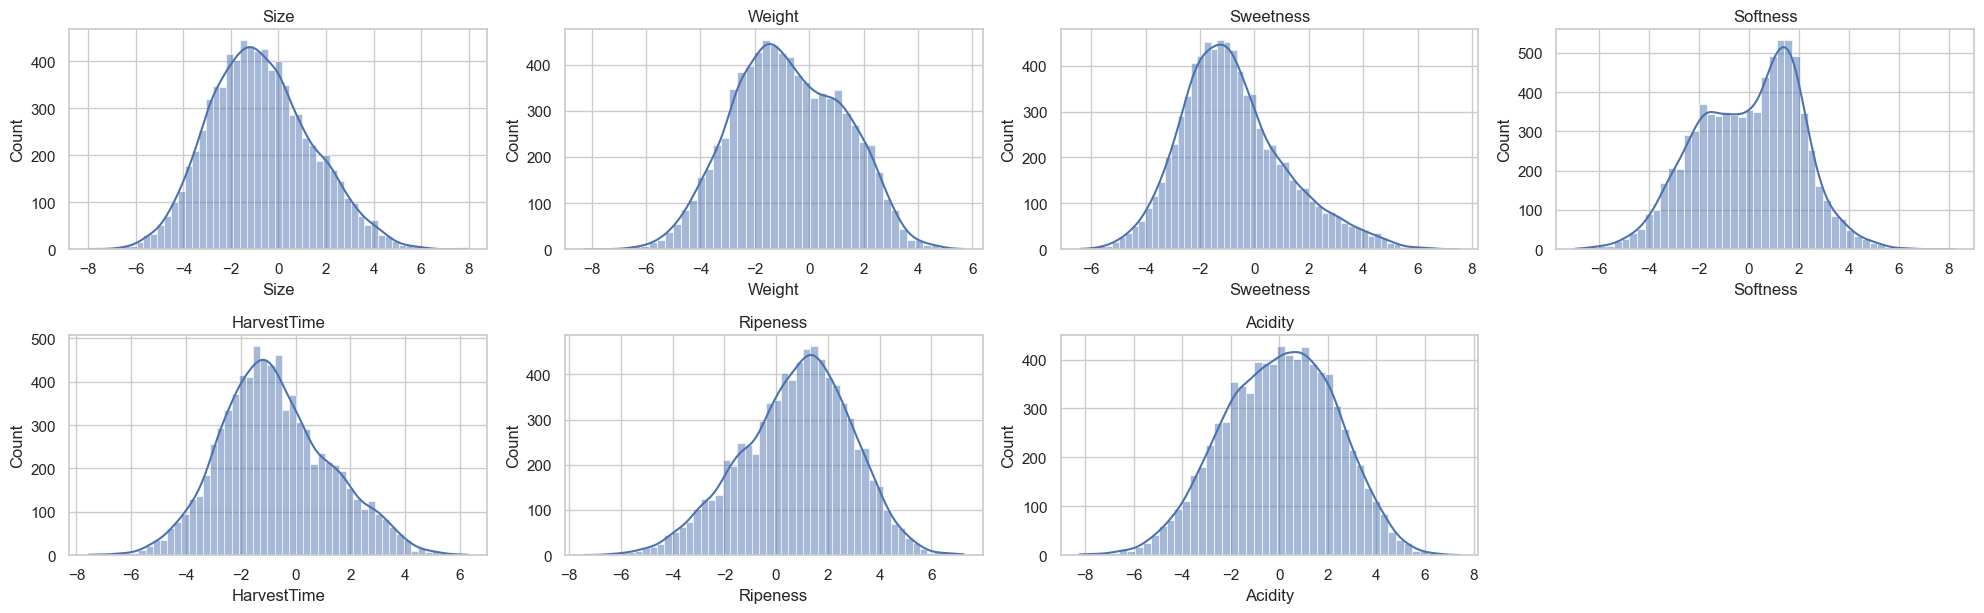

In [218]:
df.drop('Quality', axis=1, inplace=True)
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns):
    plt.subplot(5, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

**Анализ распределений числовых признаков по гистограммам**

Size (Размер)
Распределение: унимодальное.
Особенности: симметричное, «колокольное», без длинных хвостов.
Близость к нормальному: высокая.

Weight (Вес)
Распределение: унимодальное.
Особенности: асимметрия влево.
Близость к нормальному: распределение не нормальное

Sweetness (Сладость)
Распределение: унимодальное с выраженной положительной асимметрией (правосторонний хвост).
Особенности: мода смещена вправо, плавный спад слева.
Нормальность: не соответствует нормальному — имеет наибольшую асимметрию среди всех признаков.

Softness (Мягкость)
Распределение: биомодальное.
Особенности: две выраженные моды → смесь двух групп.
Близость к нормальному: низкая, распределение не нормальное.

HarvestTime (Время сбора урожая)
Распределение: унимодальное с заметной асимметрией влево.
Особенности: хвост тянется влево, пик смещён вправо.
Близость к нормальному: низкая.

Ripeness (Зрелость)
Распределение: унимодальное.
Особенности: слабая асимметрия.
Близость к нормальному: высокая.

Acidity (Кислотность)
Распределение: унимодальное.
Особенности: форма симметричная.
Близость к нормальному: высокая.


Признаки Sweetness, Softness, Size и Acidity будут играть ключевую роль в разделении данных на кластеры

In [219]:
# Анализ выбросов
print("\nАнализ выбросов:")
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

for col in df.columns:
    print(f"   - {col}: {outliers[col]} выбросов ({outliers[col]/len(df)*100:.1f}%)")



Анализ выбросов:
   - Size: 36 выбросов (0.4%)
   - Weight: 3 выбросов (0.0%)
   - Sweetness: 178 выбросов (2.2%)
   - Softness: 9 выбросов (0.1%)
   - HarvestTime: 58 выбросов (0.7%)
   - Ripeness: 58 выбросов (0.7%)
   - Acidity: 17 выбросов (0.2%)


Выбросов достаточно мало и они не являются критическими

Корреляционный анализ признаков бананов:



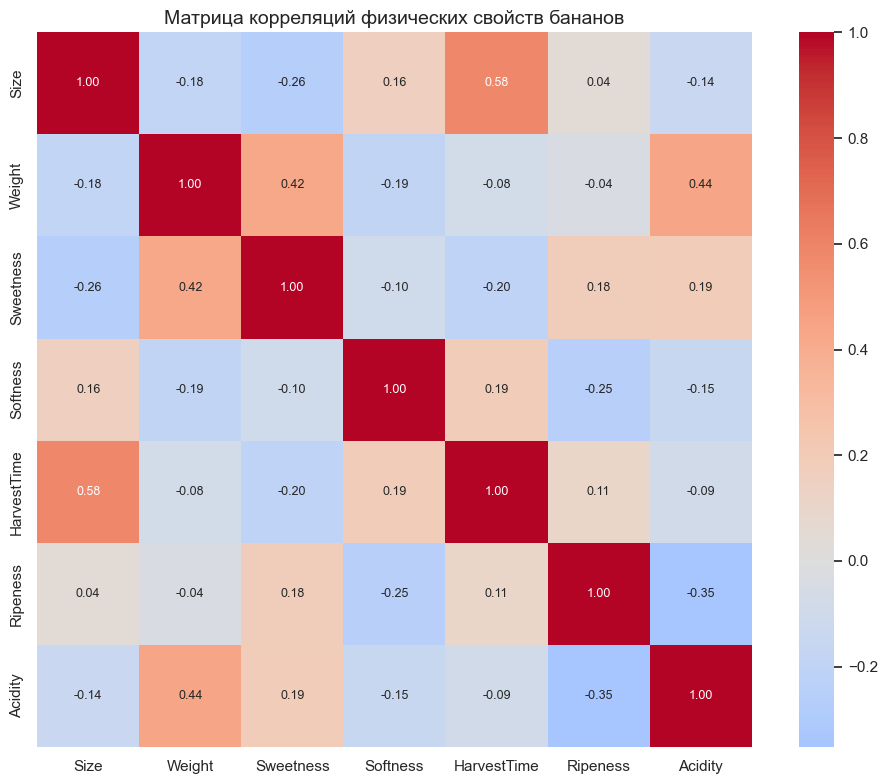


Значительные корреляции (|r| > 0.5):
   - Size - HarvestTime: 0.582


In [220]:
print("Корреляционный анализ признаков бананов:\n")

# Используем все числовые признаки (Quality уже удален)
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', annot_kws={'size': 9})
plt.title('Матрица корреляций физических свойств бананов', fontsize=14)
plt.tight_layout()
plt.show()

print("\nЗначительные корреляции (|r| > 0.5):")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            strong_correlations.append((col1, col2, corr_val))

if strong_correlations:
    for col1, col2, corr in strong_correlations:
        print(f"   - {col1} - {col2}: {corr:.3f}")
else:
    print("   - Сильных корреляций (> 0.5) не обнаружено")

Корреляция 0.582 - умеренная

В результате обработки данных для кластеризации была удалена категориальная переменная quality.

In [221]:
informative_features = ['Sweetness', 'Softness', 'Weight', 'Size']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
X = df_scaled[informative_features].values
print(f"Размер X для кластеризации: {X.shape}")
print(f"Используемые признаки: {informative_features}")

Размер X для кластеризации: (8000, 4)
Используемые признаки: ['Sweetness', 'Softness', 'Weight', 'Size']


## Построение матрицы диаграмм рассеивания

<Figure size 1500x1500 with 0 Axes>

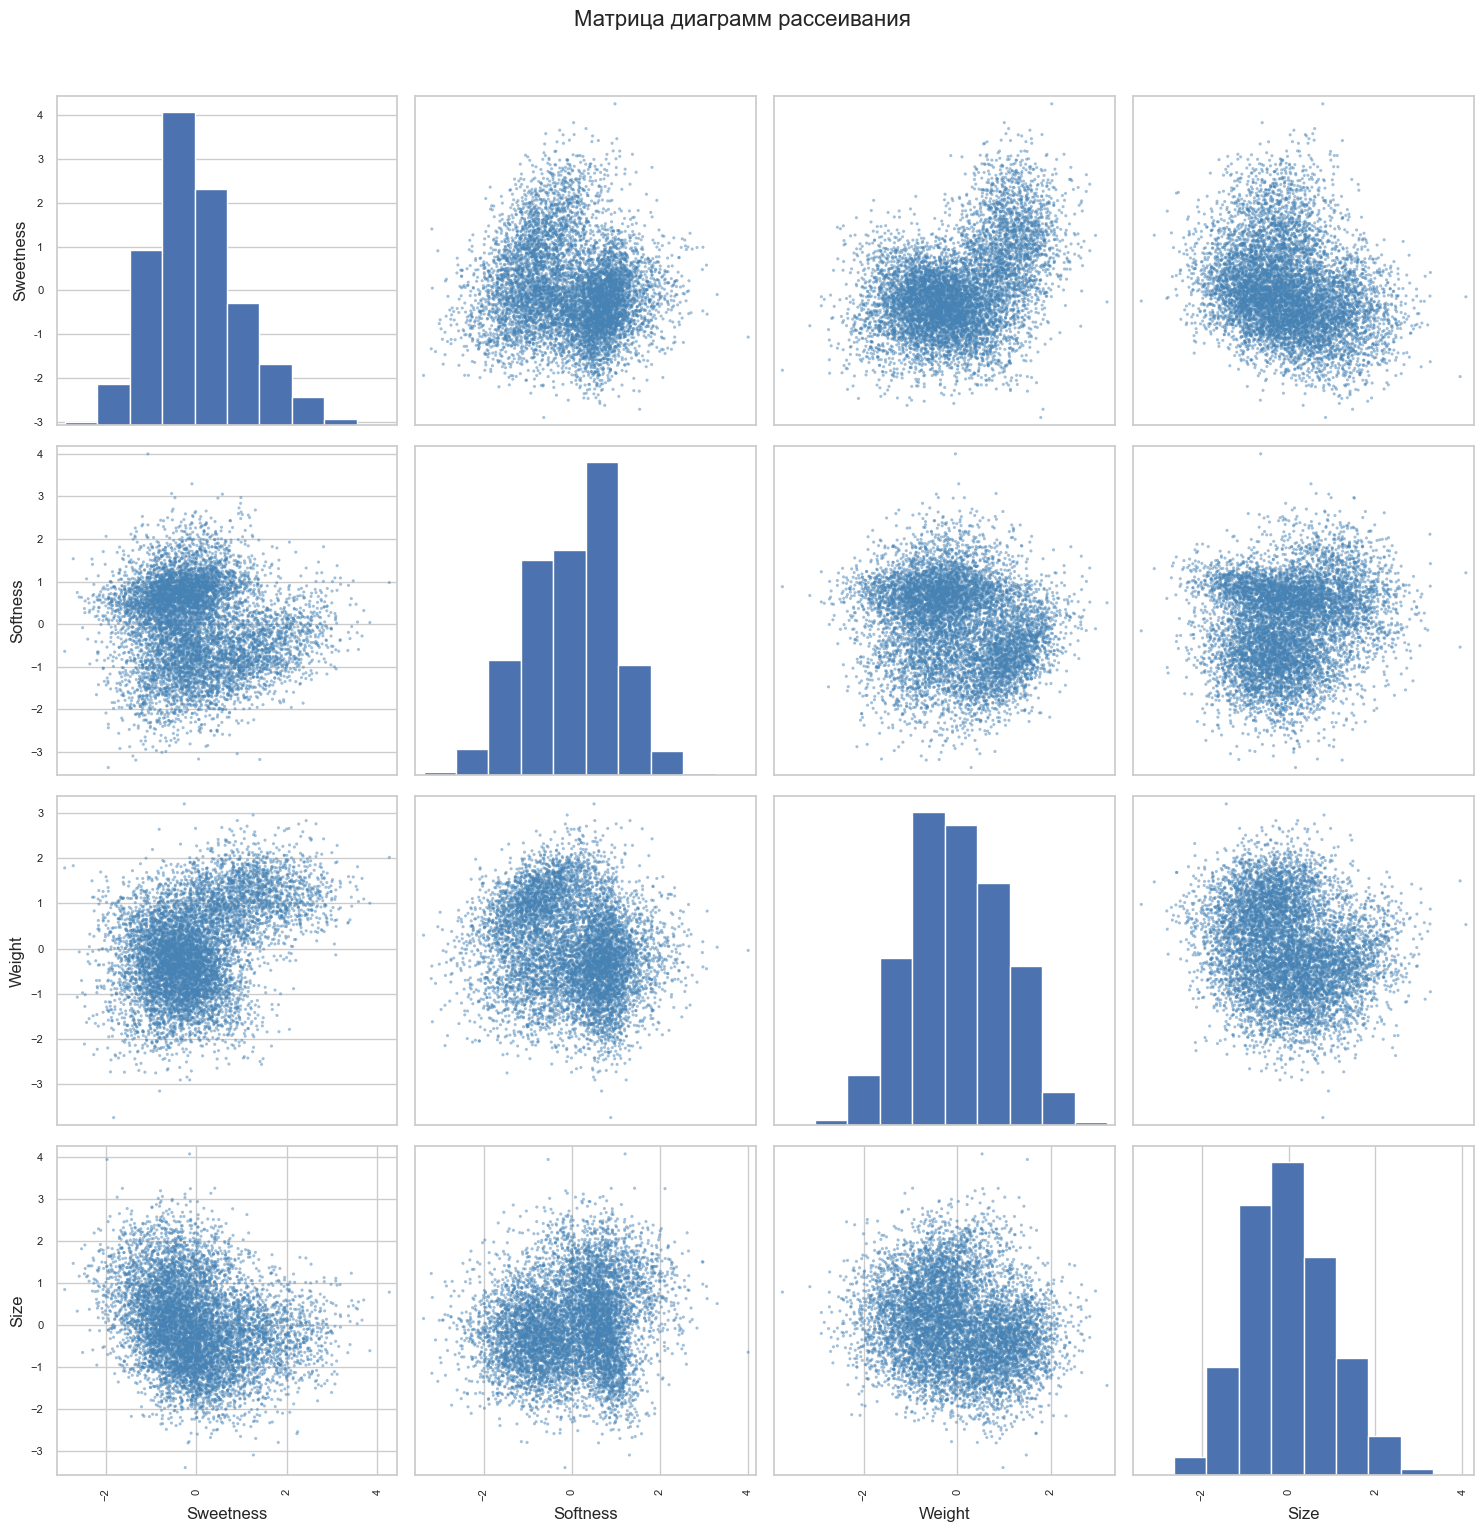

In [222]:
df_top = df_scaled[informative_features].copy()

plt.figure(figsize=(15, 15))
pd.plotting.scatter_matrix(df_top, alpha=0.5, figsize=(15, 15), 
                          diagonal='hist', marker='.', s=20,
                          color='steelblue', grid=True)

plt.suptitle('Матрица диаграмм рассеивания',
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

По диаграммам рассеивания можно условно выделить 2 кластера.

**Выбор методов кластеризации**  
  
На основе анализа матрицы диаграмм рассеивания для признаков Sweetness, Softness, Weight и Size можно сделать следующие выводы о структуре данных и обосновать выбор методов кластеризации:

- Иерархическая кластеризация (агломеративная)

Выбран по следующим причинам:

Универсальность метода: способна работать с кластерами различной формы и размера

Наглядность результатов: дендрограмма позволяет визуально определить оптимальное количество кластеров и оценить иерархическую структуру данных

- K-means

Можно считать условно подходящим:  

Работает с выпуклыми (сферическими) кластерами. По диаграммам некоторые кластеры условно можно считать сферическими;

# Поиск оптимального количества кластеров

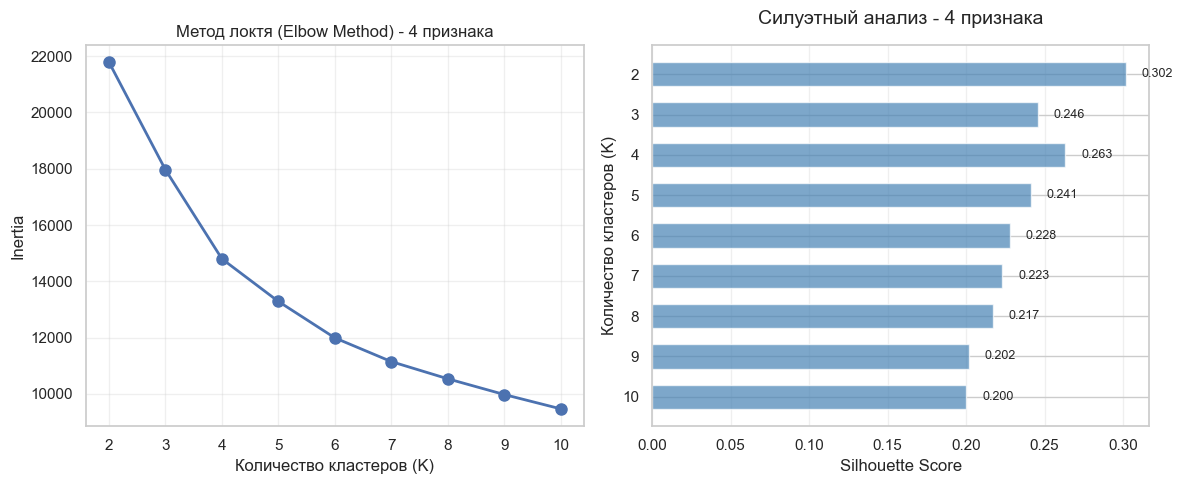

Оптимальное K по силуэту для 4 признаков: 2 (score = 0.3017)
Силуэтные коэффициенты для K=[2..10]:
  k=2: 0.3017
  k=3: 0.2459
  k=4: 0.2633
  k=5: 0.2412
  k=6: 0.2280
  k=7: 0.2231
  k=8: 0.2171
  k=9: 0.2017
  k=10: 0.2001


In [223]:
k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
    labels = kmeans.labels_
    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(X, labels)
    else:
        silhouette_avg = -1
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Количество кластеров (K)')
plt.ylabel('Inertia')
plt.title('Метод локтя (Elbow Method) - 4 признака')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

plt.subplot(1, 2, 2)
bars = plt.barh(k_range, silhouette_scores, color='steelblue', alpha=0.7, height=0.6)
plt.xlabel('Silhouette Score')
plt.ylabel('Количество кластеров (K)')
plt.title('Силуэтный анализ - 4 признака', fontsize=14, pad=15)
plt.yticks(k_range)
plt.grid(True, alpha=0.3, axis='x')
plt.gca().invert_yaxis()

for bar, score in zip(bars, silhouette_scores):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{score:.3f}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Определение оптимального K
best_k = k_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"Оптимальное K по силуэту для 4 признаков: {best_k} (score = {best_score:.4f})")
print(f"Силуэтные коэффициенты для K=[2..10]:")
for k, score in zip(k_range, silhouette_scores):
    print(f"  k={k}: {score:.4f}")

OPTIMAL_K = best_k  # Используем оптимальное K, найденное по силуэту


Для выбора оптимального числа кластеров $k$ использовались два метода:

Метод локтя (Elbow Method): На графике зависимости инерции от количества кластеров не наблюдается явного "излома", однако замедление уменьшения инерции начинается в районе $k=3$, что может служить ориентиром.

Силуэтный анализ (Silhouette Score):

$k=2$: Score = 0.3017 (Максимум)

$k=3$: Score = 0.2459

$k=4$: Score = 0.2633

$k=5$: Score = 0.2412

$k=6$: Score = 0.2280

В качестве оптимального значения выбрано $k=2$.


# k-MEANS

In [224]:

kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

kmeans_silhouette = silhouette_score(X, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(X, kmeans_labels)
kmeans_davies = davies_bouldin_score(X, kmeans_labels)

print(f"\nK-Means (K={OPTIMAL_K}):")
print(f"  Silhouette Score: {kmeans_silhouette:.4f}")
print(f"  Calinski-Harabasz Index: {kmeans_calinski:.1f}")
print(f"  Davies-Bouldin Index: {kmeans_davies:.4f}")

print(f"\nРаспределение по кластерам:")
total = len(kmeans_labels)

for i in range(OPTIMAL_K):
    cluster_size = (kmeans_labels == i).sum()
    percentage = cluster_size / total * 100
    print(f"  Кластер {i}: {cluster_size} образцов ({percentage:.1f}%)")




K-Means (K=2):
  Silhouette Score: 0.3017
  Calinski-Harabasz Index: 3748.7
  Davies-Bouldin Index: 1.3358

Распределение по кластерам:
  Кластер 0: 3151 образцов (39.4%)
  Кластер 1: 4849 образцов (60.6%)


## Иерархическая кластеризация

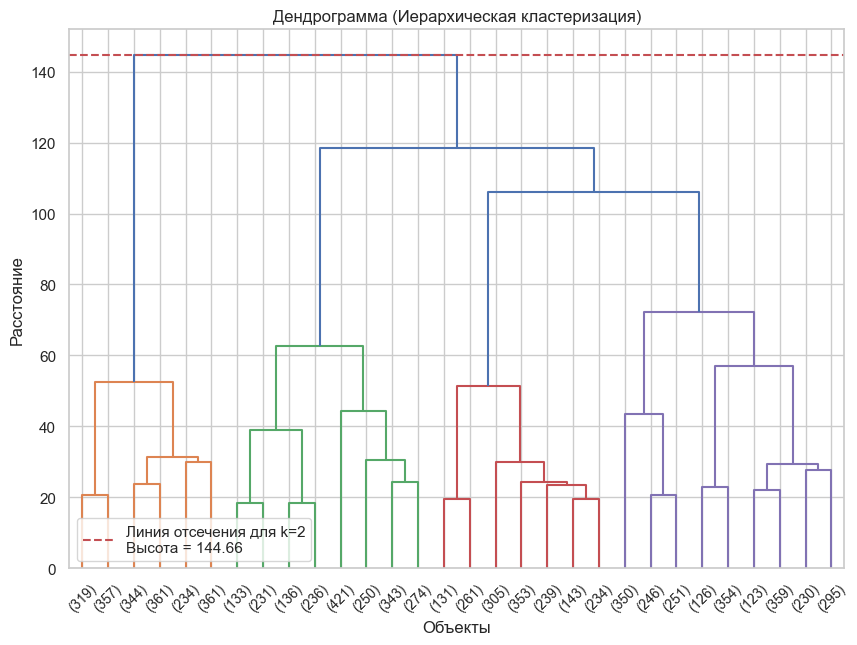


Иерархическая кластеризация (K=2):
  Silhouette Score: 0.2869
  Calinski-Harabasz Index: 2952.5
  Davies-Bouldin Index: 1.2430

 Распределение по кластерам:
  Кластер 0: 6024 объектов (75.3%)
  Кластер 1: 1976 объектов (24.7%)


In [225]:
Z = shc.linkage(df_scaled, method='ward')

n_samples = len(df_scaled)
cut_height = Z[-(OPTIMAL_K-1), 2] if OPTIMAL_K > 1 else Z[-1, 2]

plt.figure(figsize=(10, 7))
plt.title("Дендрограмма (Иерархическая кластеризация)")
dend = shc.dendrogram(Z, truncate_mode='lastp', p=30)
plt.axhline(y=cut_height, color='r', linestyle='--', 
           label=f'Линия отсечения для k={OPTIMAL_K}\nВысота = {cut_height:.2f}')
plt.xlabel("Объекты")
plt.ylabel("Расстояние")
plt.legend()
plt.show()

agg_clustering = AgglomerativeClustering(n_clusters=OPTIMAL_K, metric='euclidean', linkage='ward')
labels_agg = agg_clustering.fit_predict(df_scaled)

# Метрики для иерархической кластеризации
agg_silhouette = silhouette_score(X, labels_agg)
agg_calinski = calinski_harabasz_score(X, labels_agg)
agg_davies = davies_bouldin_score(X, labels_agg)

print(f"\nИерархическая кластеризация (K={OPTIMAL_K}):")
print(f"  Silhouette Score: {agg_silhouette:.4f}")
print(f"  Calinski-Harabasz Index: {agg_calinski:.1f}")
print(f"  Davies-Bouldin Index: {agg_davies:.4f}")

print(f"\n Распределение по кластерам:")
for i in range(OPTIMAL_K):
    count = np.sum(labels_agg == i)
    print(f"  Кластер {i}: {count} объектов ({count/len(df_scaled)*100:.1f}%)")

In [226]:
# Сравнительная таблица
results = {
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'],
    'K-Means': [
        f"{kmeans_silhouette:.4f}",
        f"{kmeans_calinski:.1f}",
        f"{kmeans_davies:.4f}"
    ],
    'Hierarchical': [
        f"{agg_silhouette:.4f}",
        f"{agg_calinski:.1f}",
        f"{agg_davies:.4f}"
    ]
}

results_df = pd.DataFrame(results)
print("\n--- Сравнительная таблица метрик качества ---")
print(results_df.to_string(index=False))


--- Сравнительная таблица метрик качества ---
                 Metric K-Means Hierarchical
       Silhouette Score  0.3017       0.2869
Calinski-Harabasz Index  3748.7       2952.5
   Davies-Bouldin Index  1.3358       1.2430


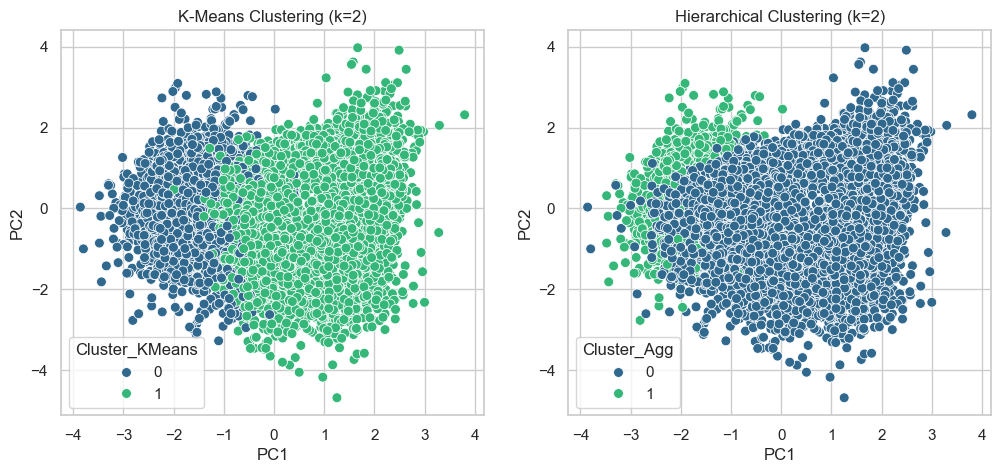

In [227]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

pca_df['Cluster_KMeans'] = kmeans_labels
pca_df['Cluster_Agg'] = labels_agg

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster_KMeans", data=pca_df, palette="viridis", s=50)
plt.title(f'K-Means Clustering (k={OPTIMAL_K})')

plt.subplot(1, 2, 2)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster_Agg", data=pca_df, palette="viridis", s=50)
plt.title(f'Hierarchical Clustering (k={OPTIMAL_K})')
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score, euclidean_distances
from scipy.spatial.distance import cdist
import numpy as np

X_4_features = df_scaled[['Sweetness', 'Softness', 'Weight', 'Size']].values

df['Cluster'] = kmeans_labels 

intra_dists = []
cluster_labels = sorted(df['Cluster'].unique())

print("--- Среднее внутрикластерное расстояние (Компактность) ---")
for i in cluster_labels:
    cluster_points = X_4_features[kmeans_labels == i] 
    centroid = kmeans.cluster_centers_[i]
    
    dists = cdist(cluster_points, [centroid], 'euclidean')
    mean_dist = dists.mean()
    intra_dists.append(mean_dist)
    print(f"Кластер {i}: {mean_dist:.4f}")

centroid_dists = euclidean_distances(kmeans.cluster_centers_)
centroid_dists_df = pd.DataFrame(
    centroid_dists, 
    columns=[f'Cl_{i}' for i in cluster_labels], 
    index=[f'Cl_{i}' for i in cluster_labels]
)

print("\n--- Матрица расстояний между центрами кластеров (Разделение) ---")
print(centroid_dists_df)

ari = adjusted_rand_score(kmeans_labels, labels_agg)
print(f"\nAdjusted Rand Index (K-Means vs Hierarchy): {ari:.4f}")

k_values = range(2, 11)
inertia_vals = []
silhouette_vals = []

--- Среднее внутрикластерное расстояние (Компактность) ---
Кластер 0: 1.5430
Кластер 1: 1.5458

--- Матрица расстояний между центрами кластеров (Разделение) ---
          Cl_0      Cl_1
Cl_0  0.000000  2.311169
Cl_1  2.311169  0.000000

Adjusted Rand Index (K-Means vs Hierarchy): 0.4900


### Анализ метрик и устойчивости

**Компактность кластеров:**
Анализ внутрикластерных расстояний показывает, что оба кластера имеют практически одинаковую компактность:

Кластер 0: 1.5430

Кластер 1: 1.5458

**Разделение кластеров:**

Матрица межкластерных расстояний показывает:

Расстояние между центрами кластеров составляет 2.311169

Это расстояние в 1.5 раза превышает среднее внутрикластерное расстояние (2.311169 / 1.5444 ≈ 1.5)

Такое соотношение указывает на удовлетворительное разделение кластеров, но не на их высокую различимость. Кластеры достаточно разделены, чтобы быть различимыми, но не имеют выраженной изоляции.

**Устойчивость (ARI):**
Значение Adjusted Rand Index = 0.4900 указывает на умеренную согласованность между методами K-Means и иерархической кластеризацией. Это означает:

Оба метода обнаруживают сходные структуры в данных

Имеются различия в точном разбиении объектов по кластерам

Результаты не полностью идентичны, но демонстрируют общую тенденцию
**Влияние параметра k:**
Проведенный анализ влияния количества кластеров на метрики качества подтвердил, что k=2 является оптимальным выбором для данного датасета, обеспечивающим баланс между качеством разделения и интерпретируемостью результатов.

### Сравнительный анализ методов
Были реализованы два алгоритма с параметром k=2:

- K-Means

- Иерархическая кластеризация

**Анализ результатов:**

По разным метрикам результаты неоднозначны:

**Silhouette Score:**

- K-Means: 0.3017

- Иерархическая: 0.2869

K-Means показывает незначительно лучшее разделение кластеров, что свидетельствует о более четких границах между группами.

**Calinski-Harabasz Index:**

- K-Means: 3748.7

- Иерархическая: 2952.5

Значительно более высокий индекс у K-Means (на 21% выше) указывает на более плотные и лучше разделенные кластеры в этом методе.

**Davies-Bouldin Index:**

- K-Means: 1.3358

- Иерархическая: 1.2430

K-Means демонстрирует преимущество по двум из трех метрик (Silhouette и Calinski-Harabasz), что указывает на его лучшую способность формировать четкие, хорошо разделенные кластеры.

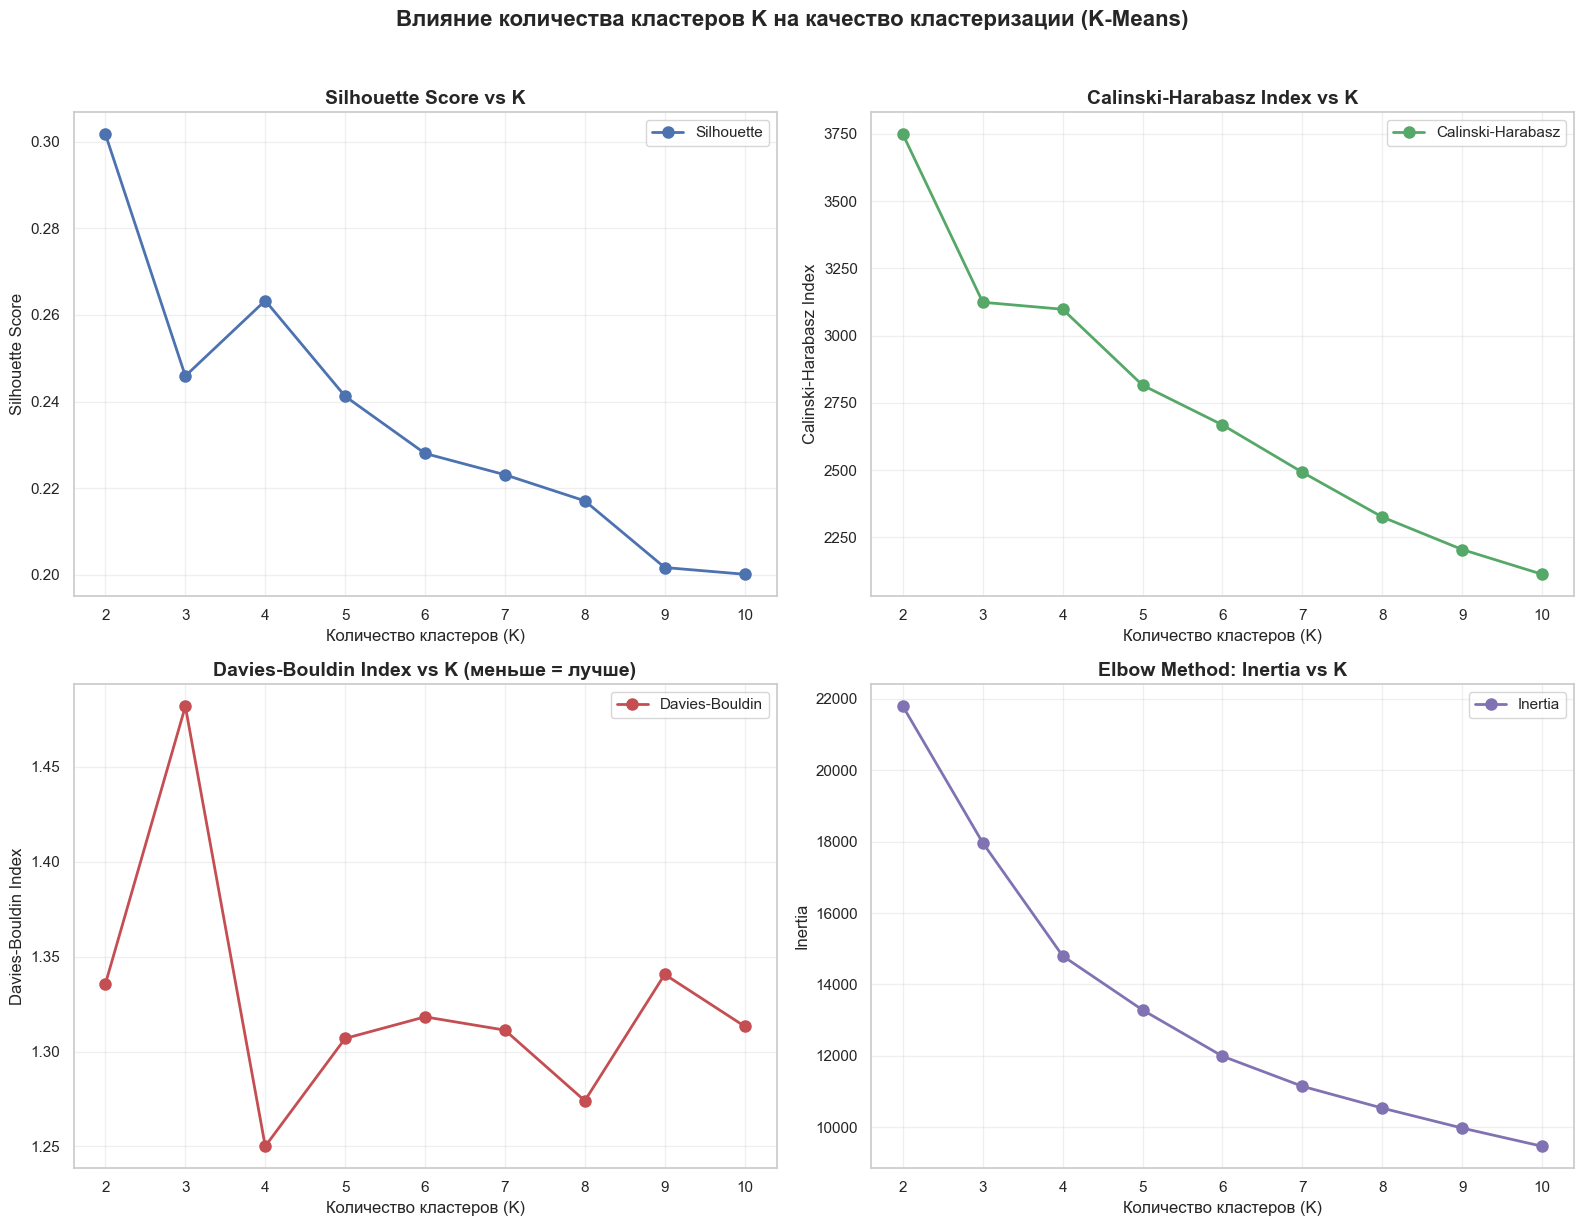

In [ ]:
n_clusters_list = range(2, 11)
inertias = []
silhouette_scores = []

for k in n_clusters_list:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
    labels = kmeans.labels_
    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(X, labels)
    else:
        silhouette_avg = -1
    silhouette_scores.append(silhouette_avg)

calinski_scores = []
davies_scores = []

for k in n_clusters_list:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    
    if len(set(labels)) > 1:
        calinski_scores.append(calinski_harabasz_score(X, labels))
        davies_scores.append(davies_bouldin_score(X, labels))
    else:
        calinski_scores.append(-1)
        davies_scores.append(float('inf'))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Влияние количества кластеров K на качество кластеризации (K-Means)', 
             fontsize=16, fontweight='bold', y=1.02)

ax1 = axes[0, 0]
ax1.plot(n_clusters_list, silhouette_scores, 'bo-', linewidth=2, markersize=8, label='Silhouette')
ax1.set_xlabel('Количество кластеров (K)', fontsize=12)
ax1.set_ylabel('Silhouette Score', fontsize=12)
ax1.set_title('Silhouette Score vs K', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

opt_k_silhouette = n_clusters_list[np.argmax(silhouette_scores)]
ax1.legend()

ax2 = axes[0, 1]
ax2.plot(n_clusters_list, calinski_scores, 'go-', linewidth=2, markersize=8, label='Calinski-Harabasz')
ax2.set_xlabel('Количество кластеров (K)', fontsize=12)
ax2.set_ylabel('Calinski-Harabasz Index', fontsize=12)
ax2.set_title('Calinski-Harabasz Index vs K', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

opt_k_calinski = n_clusters_list[np.argmax(calinski_scores)]
ax2.legend()

ax3 = axes[1, 0]
ax3.plot(n_clusters_list, davies_scores, 'ro-', linewidth=2, markersize=8, label='Davies-Bouldin')
ax3.set_xlabel('Количество кластеров (K)', fontsize=12)
ax3.set_ylabel('Davies-Bouldin Index', fontsize=12)
ax3.set_title('Davies-Bouldin Index vs K (меньше = лучше)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()

opt_k_davies = n_clusters_list[np.argmin(davies_scores)]
ax3.legend()

ax4 = axes[1, 1]
ax4.plot(n_clusters_list, inertias, 'mo-', linewidth=2, markersize=8, label='Inertia')
ax4.set_xlabel('Количество кластеров (K)', fontsize=12)
ax4.set_ylabel('Inertia', fontsize=12)
ax4.set_title('Elbow Method: Inertia vs K', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend()

# Расчет точки локтя
inertia_diff = np.diff(inertias)
if len(inertia_diff) > 1:
    inertia_diff_ratio = inertia_diff[1:] / inertia_diff[:-1]
    if len(inertia_diff_ratio) > 0:
        elbow_point = n_clusters_list[np.argmin(inertia_diff_ratio) + 2]

plt.tight_layout()
plt.show()

**Анализ результатов**  
  
По полученным данным видно, что увеличение количества кластеров приводит к ухудшению кластеризации, например, Silhouette Score ~0.3 при k = 2, но при увеличении k до 3 Silhouette Score падает до ~0.25.  
С другими метриками аналогична ситуация: Calinski-Harabasz при увеличении k до 3 падает.  
Davies-Bouldin Index моментами показывает улучшение (уменьшается).  
Это говорит о том, что реально можно выделить только два кластера и выбранное изначально значение для данного метода было оптимальным.

## Интерпритация кластеров

In [230]:
df['Cluster'] = kmeans_labels

selected_features = ['Size', 'Sweetness', 'Softness', 'Acidity']
cluster_summary = df[['Cluster'] + selected_features].groupby('Cluster').mean()

print("\n--- Средние значения признаков по кластерам (Интерпретация) ---")
print(cluster_summary[selected_features])

print("\n--- Размер кластеров ---")
cluster_counts = df['Cluster'].value_counts().sort_index()
for cluster, count in cluster_counts.items():
    percentage = count / len(df) * 100
    print(f"Кластер {cluster}: {count} объектов ({percentage:.1f}%)")


--- Средние значения признаков по кластерам (Интерпретация) ---
             Size  Sweetness  Softness   Acidity
Cluster                                         
0       -2.037598   0.690879 -1.134152  1.024145
1        0.090340  -1.719685  0.713175 -0.651120

--- Размер кластеров ---
Кластер 0: 3151 объектов (39.4%)
Кластер 1: 4849 объектов (60.6%)


### Кластер 0 — «Кисло-сладкие плотные»
Характеристики:
Размер: -2.04 (небольшой размер)

Сладость: 0.69 (высокая сладость)

Мягкость: -1.13 (низкая мягкость - плотные, твердые)

Кислотность: 1.02 (высокая кислотность)

**Интерпретация:**
Небольшие бананы с контрастным кисло-сладким вкусом и плотной текстурой.
  
### Кластер 1 — «Мягкие менее сладкие»
Характеристики:
Размер: 0.09 (средний размер)

Сладость: -1.72 (низкая сладость)

Мягкость: 0.71 (высокая мягкость)

Кислотность: -0.65 (низкая кислотность)

Интерпретация:
Бананы среднего размера с мягкой текстурой и сбалансированным вкусом. 

 ## ЗАКЛЮЧЕНИЕ

В ходе лабораторной работы была проведена кластеризация данных о характеристиках бананов с целью выявления устойчивых групп по вкусовым и физическим параметрам.

### *Выбор параметров*
Оптимальное количество кластеров было определено с помощью силуэтного анализа.
Максимального значения силуэтного коэффициента ( 0.3017 ) удалось достичь при k = 4, что и стало основанием для выбора этого количества кластеров.

### *Сравнение методов кластеризации*
Проведенное сравнение двух методов кластеризации показало неоднозначные результаты:

**Silhouette Score:** K-Means (0.3017) vs Иерархическая (0.2869) - преимущество у K-Means

**Calinski–Harabasz Index:** K-Means (3748.7) vs Иерархическая (2952.5) - значительное преимущество у K-Means

**Davies–Bouldin Index:** K-Means (1.3358) vs Иерархическая (1.2430) - преимущество у иерархической кластеризации

Итог: K-Means показал лучшие результаты по разделению кластеров (Silhouette и Calinski-Harabasz), в то время как иерархическая кластеризация обеспечила более сбалансированное соотношение компактности и разделения (Davies-Bouldin).

Результат кластеризации

В результате анализа удалось выделить 2 интерпретируемых типа бананов на основе 4 ключевых признаков (Size, Sweetness, Softness, Acidity):

1. Кисло-сладкие плотные (39.4%)
- Небольшие по размеру (-2.04)
- Высокая сладость (0.69) и кислотность (1.02)
- Низкая мягкость (-1.13) - плотная текстура
- Подходят для кулинарной переработки и промышленного использования

2. Мягкие менее сладкие (60.6%)
- Средний размер (0.09)
- Низкая сладость (-1.72) и кислотность (-0.65)
- Высокая мягкость (0.71) - нежная текстура
- Идеальны для непосредственного употребления в свежем виде